# Constraints on Pre-Recombination Early Dark Energy from SPT-3G Public Data 

## Preamble

In [18]:
import getdist
import matplotlib
from getdist import loadMCSamples, plots

getdist.chains.print_load_details = False


def get_default_settings():
    from getdist.plots import GetDistPlotSettings

    plot_settings = GetDistPlotSettings()
    plot_settings.linewidth = 3
    plot_settings.axes_labelsize = 18
    plot_settings.axes_fontsize = 15
    plot_settings.legend_fontsize = 19
    plot_settings.figure_legend_loc = "upper right"
    plot_settings.figure_legend_frame = False

    return plot_settings


print("Matplotlib :", matplotlib.__version__)
print("   GetDist :", getdist.__version__)

Matplotlib : 3.5.1
   GetDist : 1.3.3


## Loading chains configuration 

In [21]:
import yaml

config = yaml.load(open("ede_spt.yml", "r"), Loader=yaml.SafeLoader)


def get(chains, key):
    return [v.get(key) for k, v in config.items() if k in chains]

## Downloading MCMC chains

In [51]:
import os
import tarfile

import requests


def download_and_extract(url):
    r = requests.get(url, stream=True)
    file = tarfile.open(fileobj=r.raw, mode="r|gz")
    file.extractall(path="data")


nersc_url = r"https://portal.nersc.gov/cfs/sobs/users/alaposta/ede_spt"

for k in config.keys():
    if os.path.exists(f"data/{k}"):
        continue
    print(f"Downloading '{k}' chains...")
    download_and_extract(f"{nersc_url}/{k}.tar.gz")

## Figure 1: Marginalized posterior distributions of EDE & ΛCDM parameters derived from Planck 2018, ACT DR4 and SPT-3G

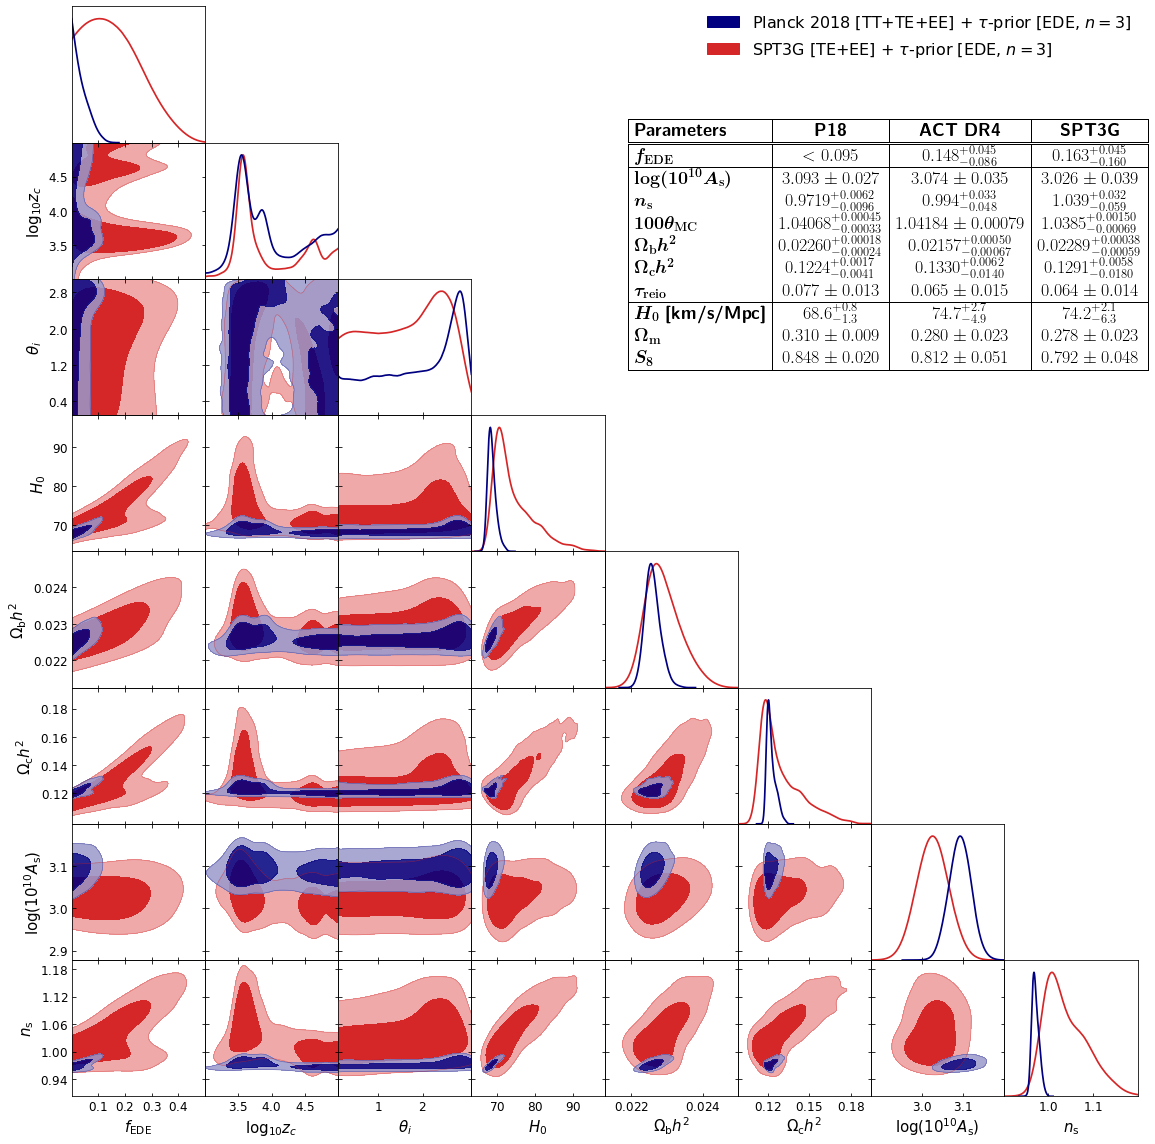

In [49]:
chains = ["p18", "spt3g"]

samples = [
    loadMCSamples(os.path.join(p, "mcmc"), settings={"ignore_rows": 0.5})
    for p in get(chains, "path")
]

g = plots.get_subplot_plotter(settings=get_default_settings())
g.triangle_plot(
    samples,
    ["fde_zc", "log10_zc", "theta_i", "H0", "ombh2", "omch2", "logA", "ns"],
    legend_labels=get(chains, "label"),
    contour_colors=get(chains, "color"),
    filled=True,
    label_order=-1,
)

table_results = r"""
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Parameters} & \textbf{P18} & \textbf{ACT DR4} & \textbf{SPT3G} \\
\hline\hline
\boldmath{$f_\mathrm{EDE}$}       & $<0.095$ & $0.148^{+0.045}_{-0.086}$ & $0.163^{+0.045}_{-0.160}$ \\
\hline
\boldmath{$\log(10^{10}A_\mathrm{s})$} & $3.093\pm0.027$                 & $3.074\pm0.035$                 & $3.026\pm 0.039$ \\
\boldmath{$n_\mathrm{s}$}              & $0.9719^{+0.0062}_{-0.0096}$    & $0.994^{+0.033}_{-0.048}$       & $1.039^{+0.032}_{-0.059}$ \\
\boldmath{$100\theta_\mathrm{MC}$}     & $1.04068^{+0.00045}_{-0.00033}$ & $1.04184\pm 0.00079$            & $1.0385^{+0.00150}_{-0.00069}$ \\
\boldmath{$\Omega_\mathrm{b}h^2$}      & $0.02260^{+0.00018}_{-0.00024}$ & $0.02157^{+0.00050}_{-0.00067}$ & $0.02289^{+0.00038}_{-0.00059}$ \\
\boldmath{$\Omega_\mathrm{c}h^2$}      & $0.1224^{+0.0017}_{-0.0041}$    & $0.1330^{+0.0062}_{-0.0140}$    & $0.1291^{+0.0058}_{-0.0180}$ \\
\boldmath{$\tau_\mathrm{reio}$}        & $0.077\pm 0.013$                & $0.065\pm 0.015$                & $0.064\pm 0.014$ \\
\hline
\boldmath{$H_0$} \textbf{[km/s/Mpc]} & $68.6^{+0.8}_{-1.3}$ & $74.7^{+2.7}_{-4.9}$ & $74.2^{+2.1}_{-6.3}$ \\
\boldmath{$\Omega_\mathrm{m}$}       & $0.310\pm 0.009$     & $0.280\pm 0.023$     & $0.278\pm 0.023$ \\
\boldmath{$S_8$}                     & $0.848\pm 0.020$     & $0.812\pm 0.051$     & $0.792\pm 0.048$ \\
\hline
\end{tabular}
"""
kwargs = dict(x=1.0, y=0.78, size=18, ha="right", usetex=True)
g.fig.text(s=table_results.replace("\n", ""), **kwargs);

## Figure 2: Marginalized posterior distributions of EDE & ΛCDM parameters derived from SPT-3G combined with Planck 2018

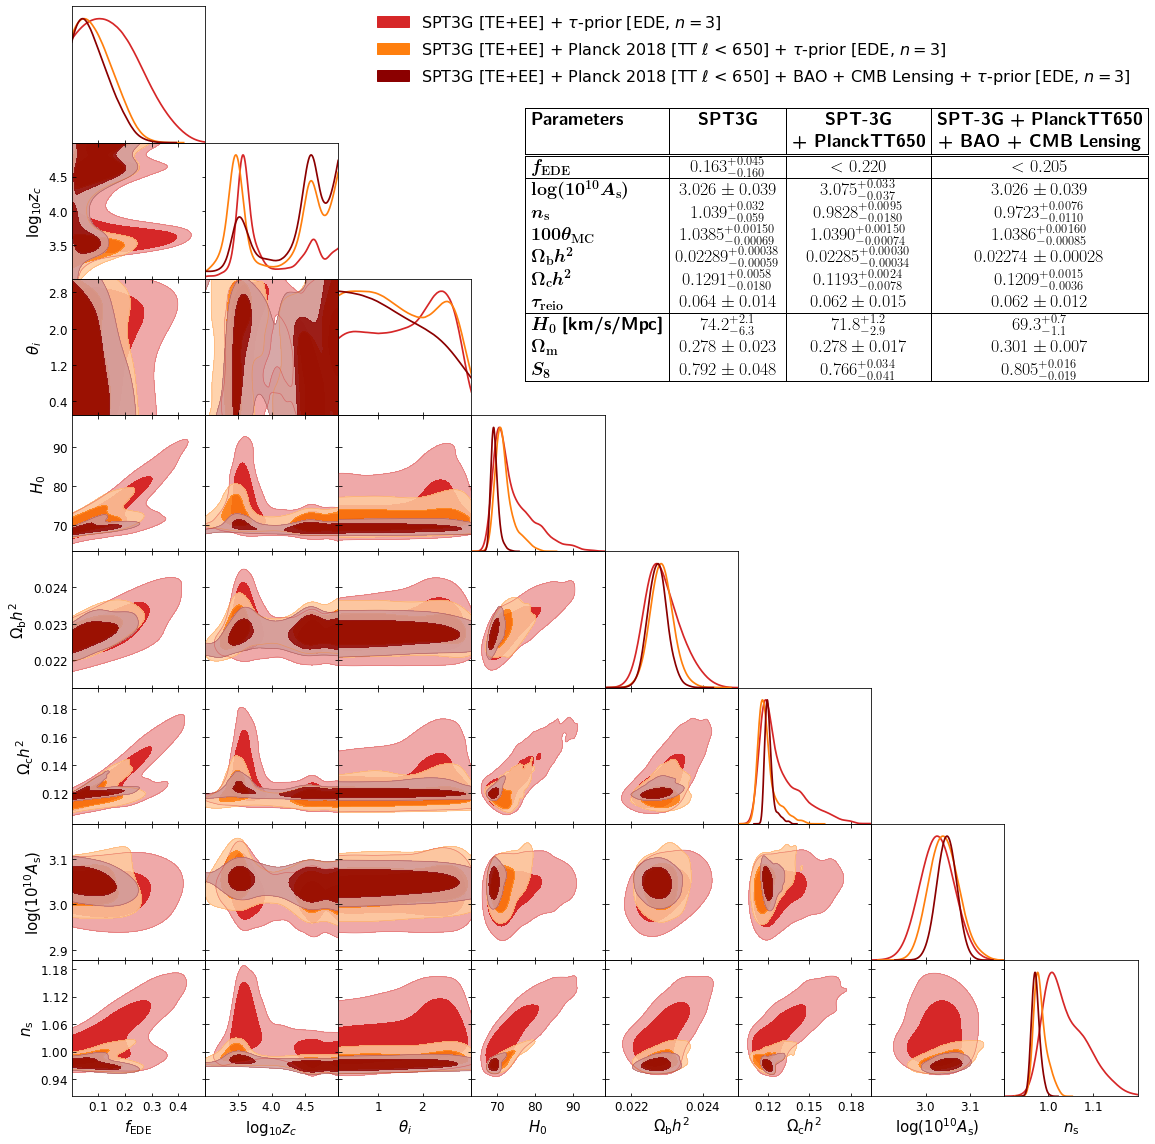

In [50]:
chains = ["spt3g", "spt3g_p18tt650", "spt3g_p18tt650_bao_lensing"]

samples = [
    loadMCSamples(os.path.join(p, "mcmc"), settings={"ignore_rows": 0.5})
    for p in get(chains, "path")
]

g = plots.get_subplot_plotter(settings=get_default_settings())
g.triangle_plot(
    samples,
    ["fde_zc", "log10_zc", "theta_i", "H0", "ombh2", "omch2", "logA", "ns"],
    legend_labels=get(chains, "label"),
    contour_colors=get(chains, "color"),
    filled=True,
)

table_results = r"""
\begin{tabular}{|l|c|c|c|}
\hline
\textbf{Parameters} & \textbf{SPT3G} & \textbf{SPT-3G}        & \textbf{SPT-3G + PlanckTT650} \\
                    &                & \textbf{+ PlanckTT650} & \textbf{+ BAO + CMB Lensing} \\
\hline\hline
\boldmath{$f_\mathrm{EDE}$}       & $0.163^{+0.045}_{-0.160}$ & $<0.220$ & $<0.205$ \\
\hline
\boldmath{$\log(10^{10}A_\mathrm{s})$} & $3.026\pm 0.039$                & $3.075^{+0.033}_{-0.037}$       & $3.026\pm 0.039$ \\
\boldmath{$n_\mathrm{s}$}              & $1.039^{+0.032}_{-0.059}$       & $0.9828^{+0.0095}_{-0.0180}$    & $0.9723^{+0.0076}_{-0.0110}$ \\
\boldmath{$100\theta_\mathrm{MC}$}     & $1.0385^{+0.00150}_{-0.00069}$  & $1.0390^{+0.00150}_{-0.00074}$  & $1.0386^{+0.00160}_{-0.00085}$ \\
\boldmath{$\Omega_\mathrm{b}h^2$}      & $0.02289^{+0.00038}_{-0.00059}$ & $0.02285^{+0.00030}_{-0.00034}$ & $0.02274\pm 0.00028$\\
\boldmath{$\Omega_\mathrm{c}h^2$}      & $0.1291^{+0.0058}_{-0.0180}$    & $0.1193^{+0.0024}_{-0.0078}$    & $0.1209^{+0.0015}_{-0.0036}$ \\
\boldmath{$\tau_\mathrm{reio}$}        & $0.064\pm 0.014$                & $0.062\pm 0.015$                & $0.062\pm 0.012$ \\
\hline
\boldmath{$H_0$} \textbf{[km/s/Mpc]} & $74.2^{+2.1}_{-6.3}$ & $71.8^{+1.2}_{-2.9}$      & $69.3^{+0.7}_{-1.1}$   \\
\boldmath{$\Omega_\mathrm{m}$}       & $0.278\pm 0.023$     & $0.278\pm 0.017$          & $0.301\pm 0.007$ \\
\boldmath{$S_8$}                     & $0.792\pm 0.048$     & $0.766^{+0.034}_{-0.041}$ & $0.805^{+0.016}_{-0.019}$ \\
\hline
\end{tabular}
"""
g.fig.text(s=table_results.replace("\n", ""), **kwargs);